# Dependencies

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('cleaned_hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
31216,Resort Hotel,0,0,2019,September,27,5,0,1,2,...,0,No Deposit,240,0,0,Family,113.0,0,0,Check-Out
23156,Resort Hotel,0,146,2018,December,41,4,0,4,3,...,0,No Deposit,240,0,0,Personal,182.0,0,0,Check-Out
26933,Resort Hotel,0,8,2019,April,7,13,1,0,2,...,0,No Deposit,240,0,0,Personal,60.0,0,1,Check-Out
47221,City Hotel,1,184,2019,June,16,18,0,3,3,...,0,No Deposit,9,0,0,Personal,149.4,0,1,Canceled
84136,City Hotel,0,87,2019,October,32,10,0,1,2,...,0,No Deposit,9,0,0,Personal,134.0,0,1,Check-Out


In [ ]:
df = df.copy()

df1 = df.groupby(['hotel', 'arrival_date_month']).agg({
        "arrival_date_year": "nunique",
        "reservation_status": "count"
})

df1 = df1.reset_index()
df1.columns = ['hotel_type', 'month', 'no_unique_year', 'booking_count']

df1.sample(5)

,hotel_type,month,no_unique_year,booking_count
9,City Hotel,November,2,4042
18,Resort Hotel,June,2,2757
3,City Hotel,February,2,2953
23,Resort Hotel,September,3,4263
0,City Hotel,April,2,3517


In [ ]:
df1['avg_booking_count'] = df1['booking_count'] / df1['no_unique_year']
df1['avg_booking_count'] = df1['avg_booking_count'].astype(int)

df1.sample(5)

,hotel_type,month,no_unique_year,booking_count,avg_booking_count
13,Resort Hotel,August,2,2705,1352
5,City Hotel,July,2,5322,2661
20,Resort Hotel,May,2,2586,1293
1,City Hotel,August,2,4909,2454
6,City Hotel,June,2,5021,2510


In [ ]:
month_to_int = { 
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
        'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
        'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12, 
    }

df1['month_int'] = df1['month'].map(month_to_int)
df1['month'] = df1['month'].apply(lambda x: str(x)[:3])
df1 = df1.sort_values(by='month_int')
df1.sample(5)

,hotel_type,month,no_unique_year,booking_count,avg_booking_count,month_int
23,Resort Hotel,Sep,3,4263,1421,9
20,Resort Hotel,May,2,2586,1293,5
13,Resort Hotel,Aug,2,2705,1352,8
0,City Hotel,Apr,2,3517,1758,4
17,Resort Hotel,Jul,2,2864,1432,7


In [ ]:
city = df1[df1['hotel_type'] == 'City Hotel']
resort = df1[df1['hotel_type'] == 'Resort Hotel']

df1.sample(5)

,hotel_type,month,no_unique_year,booking_count,avg_booking_count,month_int
18,Resort Hotel,Jun,2,2757,1378,6
15,Resort Hotel,Feb,2,2044,1022,2
12,Resort Hotel,Apr,2,2455,1227,4
2,City Hotel,Dec,2,4009,2004,12
0,City Hotel,Apr,2,3517,1758,4


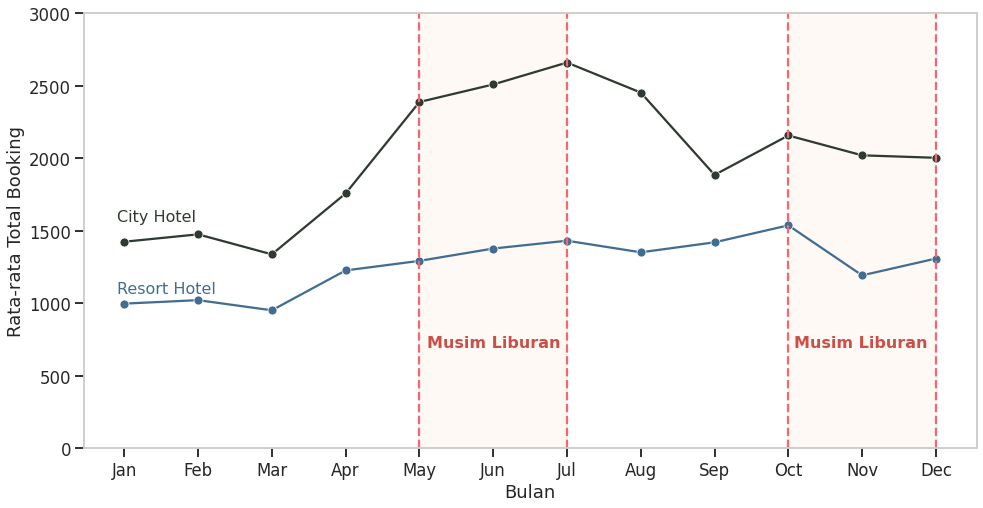

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.lineplot(data=city, x='month', y='avg_booking_count',  marker='o', ax=ax, color='#2F3B30')
sns.lineplot(data=resort, x='month', y='avg_booking_count',  marker='o', ax=ax, color='#436D90')

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.text(
    x=-0.1, 
    y=1600, 
    s='City Hotel', 
    fontsize=16,
    va='center', 
    ha='left',
    color='#2F3B30'
)

ax.text(
    x=-0.1, 
    y=1100, 
    s='Resort Hotel', 
    fontsize=16,
    va='center', 
    ha='left',
    color='#436D90'
)

plt.axvline(x=4, color='#F36870', ls='--')
plt.axvline(x=6, color='#F36870', ls='--')
plt.stackplot([4, 5, 6], [3000], color='#FFCBA4', alpha=0.1)
plt.text(x=4.1, y=700, s='Musim Liburan', fontsize=16, fontweight='bold', color='#CB4E47')

plt.axvline(x=9, color='#F36870', ls='--')
plt.axvline(x=11, color='#F36870', ls='--')
plt.stackplot([9, 10, 11], [3000], color='#FFCBA4', alpha=0.1)
plt.text(x=9.07, y=700, s='Musim Liburan', fontsize=16, fontweight='bold', color='#CB4E47')

plt.xlabel('Bulan')
plt.ylabel('Rata-rata Total Booking')
plt.grid(False)
plt.ylim([0, 3000])
plt.show()